Youtube Streamer Analysis

Dataset : Top 1000 Youtubers statistics
Description: This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more. Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.

## Import Libriaries

In [119]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

In [82]:
df=pd.read_csv(r"D:\Sousan\youtubers_df.csv")
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [83]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [84]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [85]:
df= df.drop('Links',axis=1)
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [86]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments'],
      dtype='object')

In [87]:
df= df.drop_duplicates(subset=['Username'])
df.drop_duplicates(inplace=True)
df

C:\Users\sanaf\AppData\Local\Temp\ipykernel_26240\1163645884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [88]:
df.shape

(994, 8)

In [89]:
df.describe

<bound method NDFrame.describe of      Rank              Username           Categories   Suscribers  \
0       1               tseries       Música y baile  249500000.0   
1       2               MrBeast   Videojuegos, Humor  183500000.0   
2       3             CoComelon            Educación  165500000.0   
3       4              SETIndia                  NaN  162600000.0   
4       5         KidsDianaShow  Animación, Juguetes  113500000.0   
..    ...                   ...                  ...          ...   
995   996          hamzymukbang                  NaN   11700000.0   
996   997            Adaahqueen                  NaN   11700000.0   
997   998  LittleAngelIndonesia       Música y baile   11700000.0   
998   999          PenMultiplex                  NaN   11700000.0   
999  1000         OneindiaHindi  Noticias y Política   11700000.0   

            Country       Visits      Likes  Comments  
0             India      86200.0     2700.0      78.0  
1    Estados Unidos  1174

# data cleaning and misssing value

In [91]:
df.isnull().sum()

Rank            0
Username        0
Categories    305
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
dtype: int64

# Trend Analysis

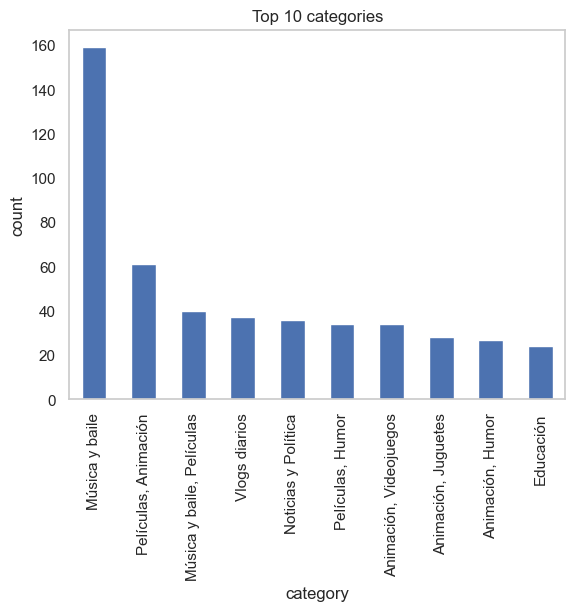

In [94]:
categories = df["Categories"].value_counts().head(10)
categories.plot(kind = "bar")
plt.grid(False)
plt.xlabel("category")
plt.ylabel("count")
plt.title("Top 10 categories")
plt.show()

In [95]:
correlation_likes = df['Suscribers'].corr(df['Likes'])
correlation_comments = df['Suscribers'].corr(df['Comments'])


In [96]:
print(f'Correlation between Subscribers and Likes: {correlation_likes}')
print(f'Correlation between Subscribers and Comments: {correlation_comments}')


Correlation between Subscribers and Likes: 0.2113958040943961
Correlation between Subscribers and Comments: 0.035985446459772356


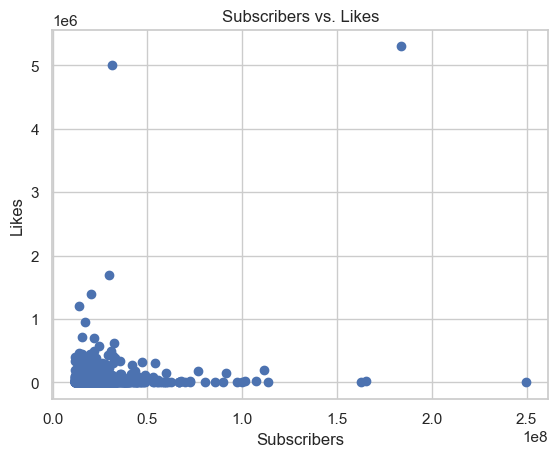

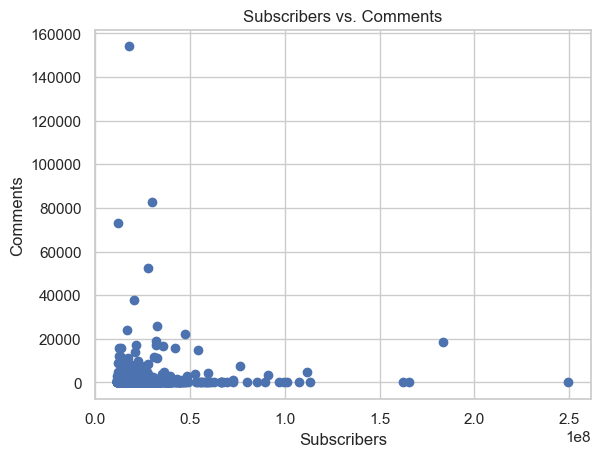

In [97]:
plt.scatter(df['Suscribers'], df['Likes'])
plt.title('Subscribers vs. Likes')
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()

plt.scatter(df['Suscribers'], df['Comments'])
plt.title('Subscribers vs. Comments')
plt.xlabel('Subscribers')
plt.ylabel('Comments')
plt.show()


# AUDIENCE STUDY

In [98]:
country_audience_distribution = df['Country'].value_counts()

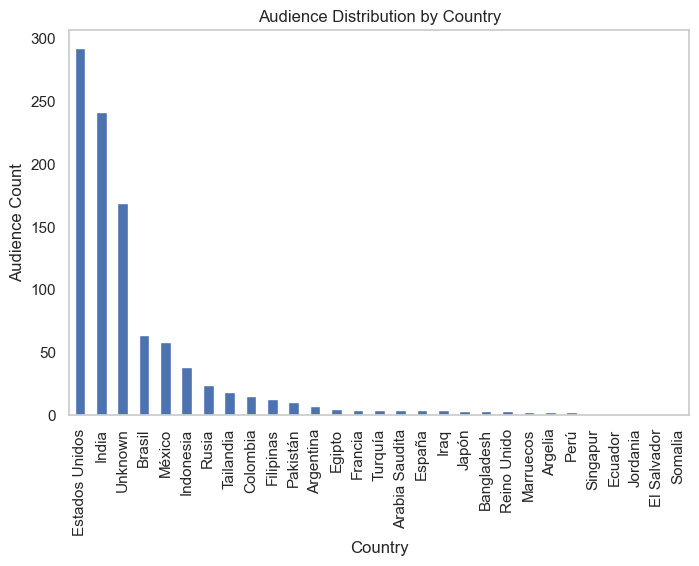

In [115]:
country_audience_distribution.plot(kind='bar', figsize=(8, 5))
plt.title('Audience Distribution by Country')
plt.grid(False)
plt.xlabel('Country')
plt.ylabel('Audience Count')
plt.show()


In [100]:
country_category_preferences = df.groupby(['Country', 'Categories']).size().unstack().fillna(0)

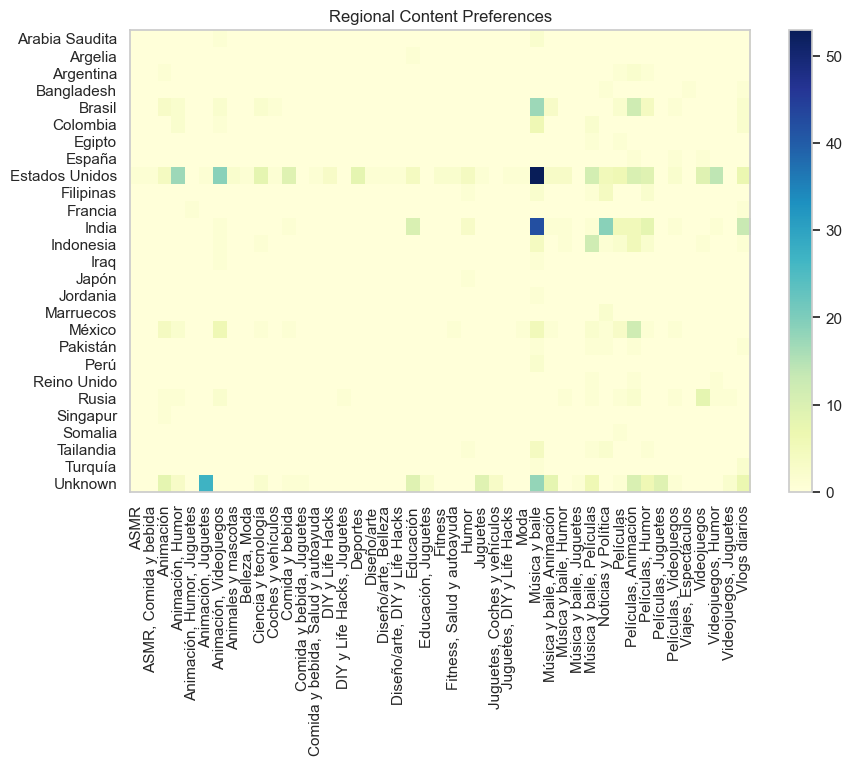

In [116]:
plt.figure(figsize=(10, 6))
plt.imshow(country_category_preferences, cmap='YlGnBu', aspect='auto', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.xticks(range(len(country_category_preferences.columns)), country_category_preferences.columns, rotation=90)
plt.yticks(range(len(country_category_preferences.index)), country_category_preferences.index)
plt.title('Regional Content Preferences')
plt.show()


# PERFORMANCE METRICS

In [102]:
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

print(f"Average Subscribers: {average_subscribers}")
print(f"Average Visits: {average_visits}")
print(f"Average Likes: {average_likes}")
print(f"Average Comments: {average_comments}")


Average Subscribers: 21930382.293762576
Average Visits: 1215600.921026157
Average Likes: 53902.42957746479
Average Comments: 1296.1569416498994


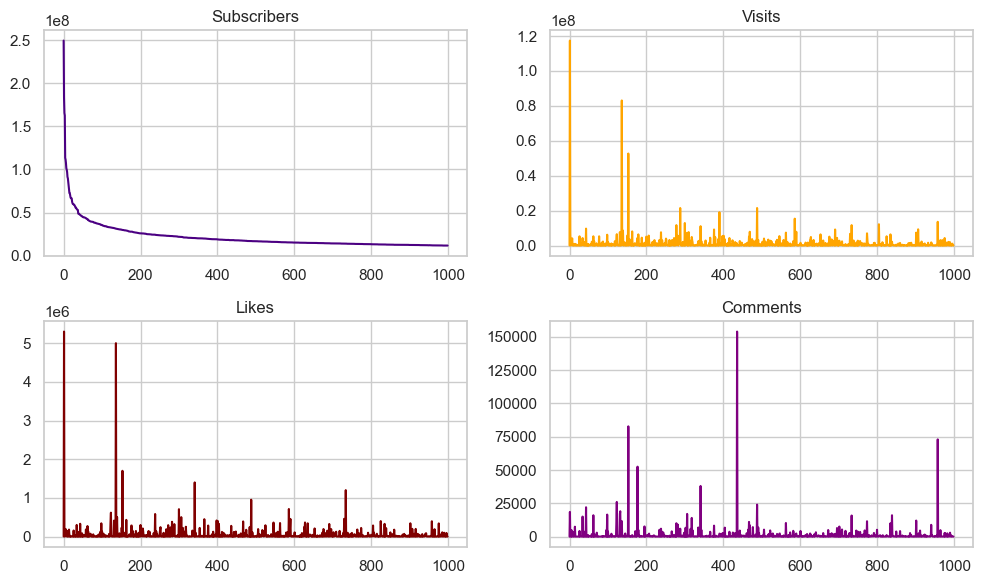

In [103]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

#Subscribers
plt.subplot(2, 2, 1)
plt.plot( df['Suscribers'], color='indigo')
plt.title('Subscribers')

# Visits
plt.subplot(2, 2, 2)
plt.plot( df['Visits'], color='orange')
plt.title('Visits')

#Likes
plt.subplot(2, 2, 3)
plt.plot( df['Likes'], color='maroon')
plt.title('Likes')

# Comments
plt.subplot(2, 2, 4)
plt.plot( df['Comments'], color='purple')
plt.title('Comments')

plt.tight_layout()
plt.show()

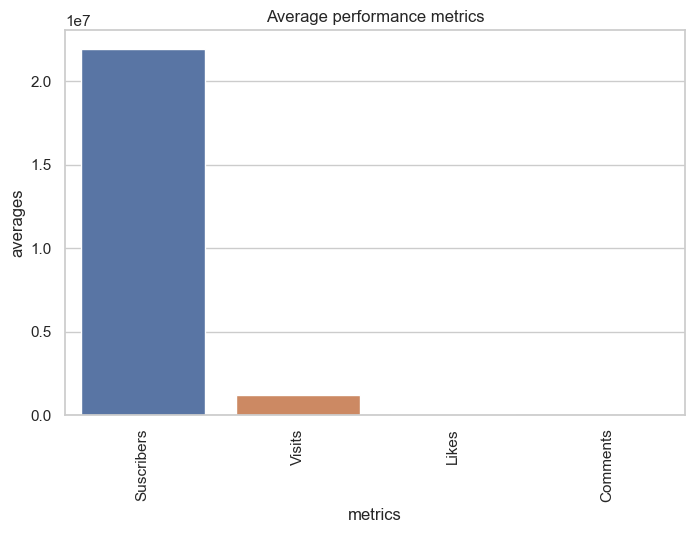

In [117]:
metrics = ['Suscribers','Visits','Likes','Comments']
avg = [average_subscribers, average_visits, average_likes, average_comments]
plt.figure(figsize=(8,5))
sns.barplot(x=metrics, y =avg)
plt.title("Average performance metrics")
plt.xlabel('metrics')
plt.ylabel('averages')
plt.xticks(rotation=90)
plt.show()

# CONTENT CATEGORIES

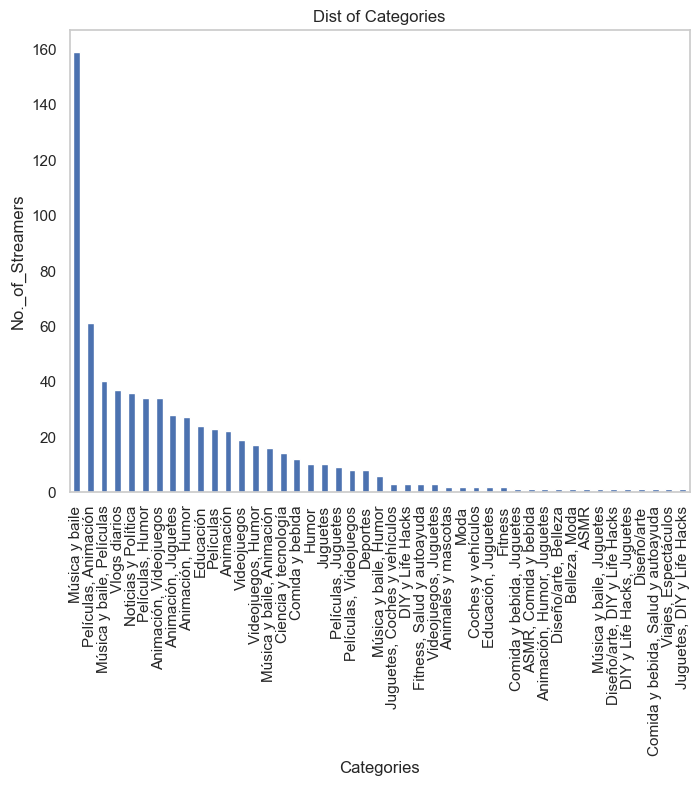

In [118]:
cat=df['Categories'].value_counts()
plt.figure(figsize=(8,6))
cat.plot(kind='bar')
plt.grid(False)
plt.title('Dist of Categories')
plt.xlabel('Categories')
plt.ylabel('No._of_Streamers')
plt.show()

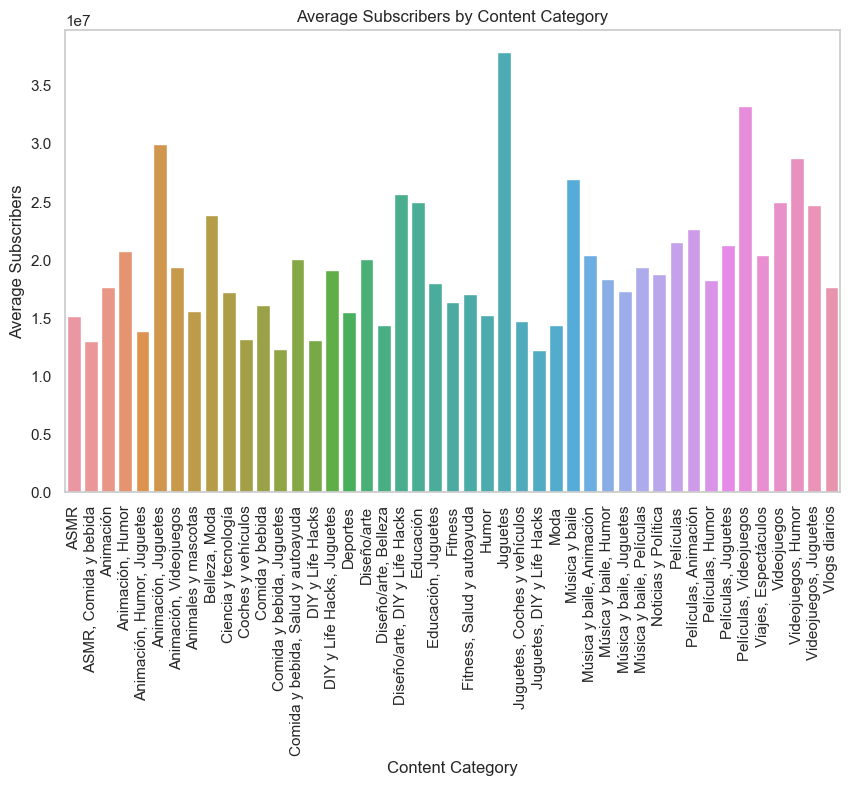

In [106]:
category_metrics = df.groupby('Categories').agg({
    'Visits': 'mean',
    'Likes': 'mean',
    'Comments': 'mean',
    'Suscribers': 'mean'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.grid(False)
sns.barplot(data=category_metrics, x='Categories', y='Suscribers')
plt.title('Average Subscribers by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=90)
plt.show()

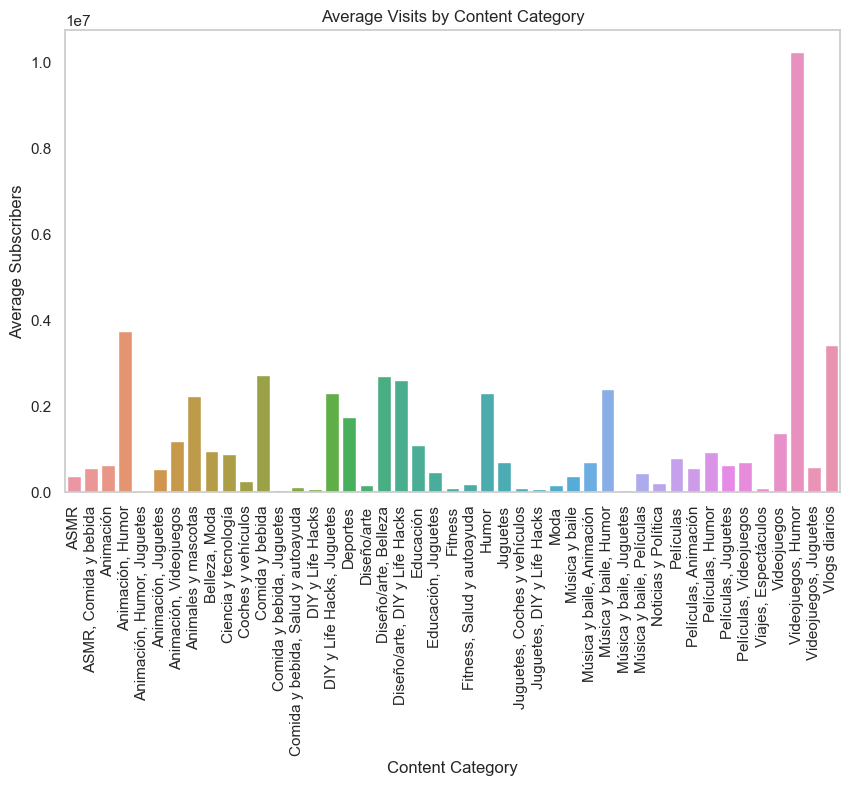

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_metrics, x='Categories', y='Visits')
plt.title('Average Visits by Content Category')
plt.grid(False)
plt.xlabel('Content Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=90)
plt.show()

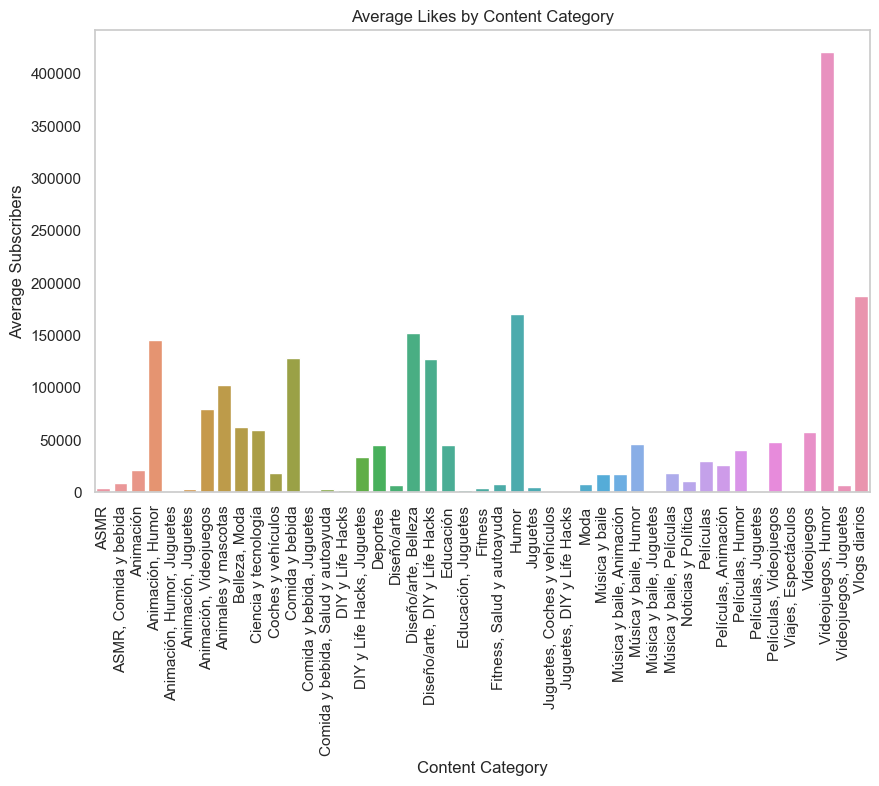

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_metrics, x='Categories', y='Likes')
plt.title('Average Likes by Content Category')
plt.grid(False)
plt.xlabel('Content Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=90)
plt.show()

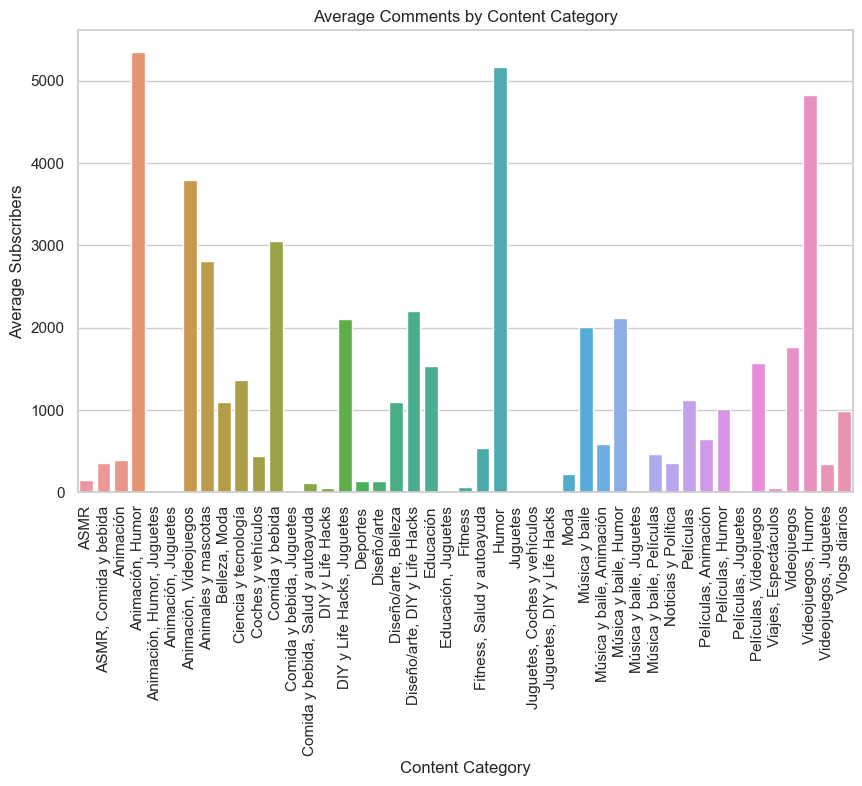

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_metrics, x='Categories', y='Comments')
plt.title('Average Comments by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=90)
plt.show()

# Brands and Collaborations

C:\Users\sanaf\AppData\Local\Temp\ipykernel_26240\4271689567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Performance'] =df['Likes'] + df['Comments']


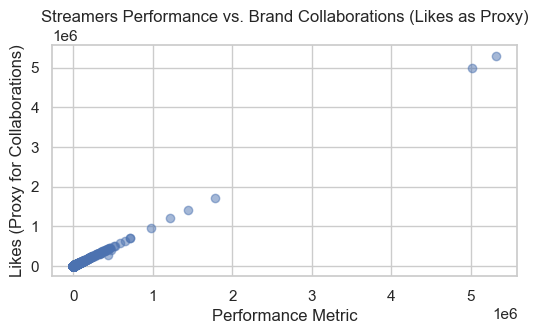

In [110]:
# Calculate a performance metric (you can define your own formula)
df['Performance'] =df['Likes'] + df['Comments']
# Plot a scatter plot to visualize the relationship between performance and number of 'Likes' or 'Comments'
plt.figure(figsize=(6, 3))
plt.scatter(df['Performance'], df['Likes'], alpha=0.5)
plt.xlabel('Performance Metric')
plt.ylabel('Likes (Proxy for Collaborations)')
plt.title('Streamers Performance vs. Brand Collaborations (Likes as Proxy)')
plt.grid(True)
plt.show()

# BENCHMARKING

In [111]:
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()


top_performing_streamers= df[
    (df['Suscribers'] > average_subscribers) &
    (df['Visits'] > average_visits) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)
]

print("Top-performing content creators:")
print(top_performing_streamers)

Top-performing content creators:
     Rank               Username                     Categories   Suscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                            NaN   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     

# CONTENT RECOMMENDATION

In [112]:
recommendation = df.groupby('Categories')['Categories'].count().sort_values(ascending=False).head()
recommendation = pd.DataFrame({'Cat_count': recommendation})
recommendation.index.name = 'Categories' 
recomm_content=recommendation.reset_index()
recomm_content

,Categories,Cat_count
0,Música y baile,159
1,"Películas, Animación",61
2,"Música y baile, Películas",40
3,Vlogs diarios,37
4,Noticias y Política,36


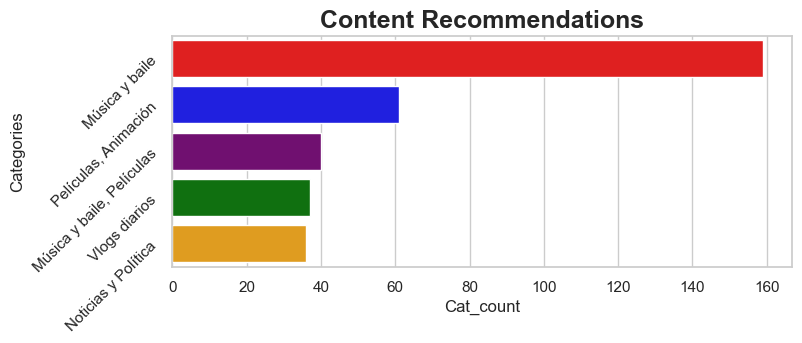

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style (optional)
sns.set(style="whitegrid")

# Your data
colors = ['red', 'blue', 'purple', 'green', 'orange']

# Create the bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='Cat_count', y='Categories', data=recomm_content, palette=colors)

# Set labels and title
plt.xlabel('Cat_count')
plt.ylabel('Categories')
plt.title('Content Recommendations', fontweight='bold', fontsize=18)

# Rotate y-axis labels if needed
plt.yticks(rotation=45)

# Show the plot
plt.show()

